The goal here is to read in the DESI footprint data. We downloaded two datafiles from [here](https://desi.lbl.gov/svn/code/desimodel/trunk/data/footprint/ ); these included `desi-healpix-weights.fits` and `desi-tiles.fits`. The data in the second file is explained [here](https://github.com/desihub/desidatamodel/blob/master/doc/DESIMODEL/data/footprint/desi-tiles.rst ).

We look at the footprint from both files and they agree. The final pixel list is saved in `/global/homes/a/awan/desc/4most_desi_data/`.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import healpy as hp
import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.io import fits

In [2]:
fontsize = 16
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize

**Set up some things**

In [3]:
data_dir = '/global/homes/a/awan/desc/4most_desi_data/'

**Read in the data**

First the firts fits file

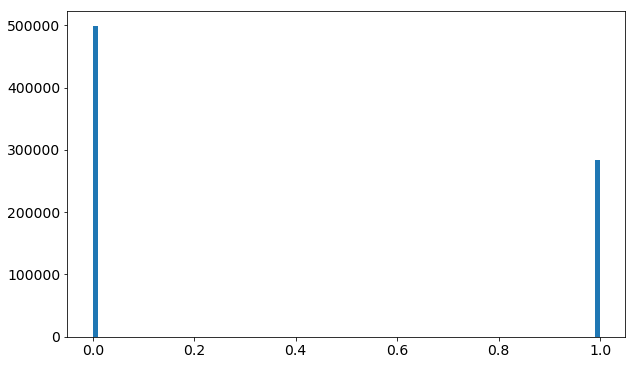

In [4]:
file = 'desi-healpix-weights.fits'

hdul = fits.open('%s/%s'%(data_dir, file))

# lets see the distribution of the data
plt.hist(hdul[0].data, bins=100)
plt.show()

Okay we can look at the data with weights=1 and see if we get the DESI footprint.

Nside = 256


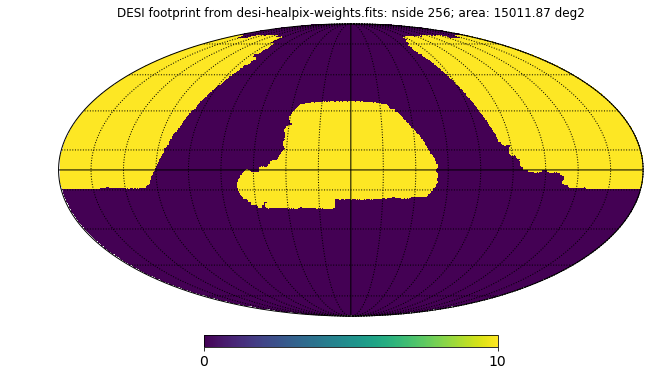

In [5]:
nside = hp.npix2nside(npix=len(hdul[0].data))

hpix_file1 = np.where(hdul[0].data>0.5)[0]
print('Nside = %s'%nside)
hpix_file1 = hp.nest2ring(ipix=hpix_file1, nside=nside)

# let plots them
vals = np.zeros(hp.nside2npix(nside))
vals[hpix_file1] = 100
hp.mollview(vals, flip='astro', rot=(0,0,0), min=0, max=10,
            title='DESI footprint from %s: nside %s; area: %.2f deg2'%(file, nside,
                                                                  hp.nside2pixarea(nside, degrees=True)*len(hpix_file1))
           )
hp.graticule(dpar=20, dmer=20, verbose=False)
plt.show()

Okay lets now read in the second file.

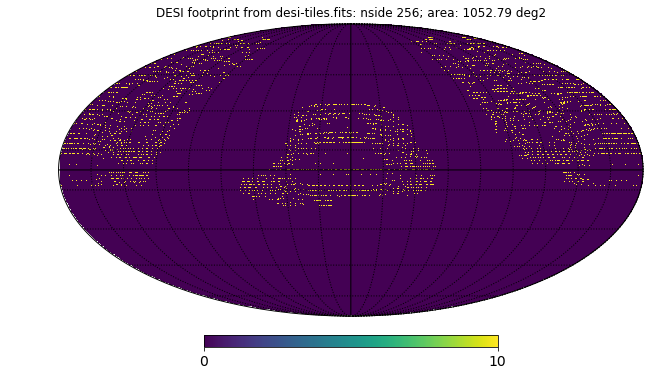

In [6]:
file = 'desi-tiles.fits'
dat = Table.read('%s/%s'%(data_dir, file), format='fits')
ind = np.where(dat['IN_DESI']==1)[0] # the flag mentioned in the markdown file
ra, dec = dat['RA'][ind], dat['DEC'][ind] # get the ra, dec of the pointings
# conver ra, dec to hpix pixesl
hpix_file2 = hp.ang2pix(nside=nside, phi=np.deg2rad(ra), theta=np.pi/2. - np.deg2rad(dec))

# let plots them
vals = np.zeros(hp.nside2npix(nside))
vals[hpix_file2] = 100
hp.mollview(vals, flip='astro', rot=(0,0,0), min=0, max=10,
            title='DESI footprint from %s: nside %s; area: %.2f deg2'%(file, nside,
                                                                  hp.nside2pixarea(nside, degrees=True)*len(hpix_file2))
           )
hp.graticule(dpar=20, dmer=20, verbose=False)
plt.show()

Okay we seem to be getting the same footprint from both files, though we'd need to make the area from the second one contiguous by hand. Lets just use the data from the first file since its easier.

**Save the data**

In [8]:
filename = 'DESI_pixels_nside%s_ring.csv'%nside
pd.DataFrame({'pixNum': hpix_file1}).to_csv('%s/%s'%(data_dir, filename), index=False)
print('Saved %s in %s'%(filename, data_dir))

Saved DESI_pixels_nside256_ring.csv in /global/homes/a/awan/desc/4most_desi_data/
